### Biased vs Unbiased Variance
As the number of samples in our dataset increases, the difference between the biased and unbiased variance decreases because deviding by **n** or **n - 1** matters less and less.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n = 10
a = np.random.random(n)
biased_var = (1/n)*((a-a.mean())**2).sum() # devide by n
unbiased_var = (1/(n-1))*((a-a.mean())**2).sum() # devide by (n-1)
print(f"Biased Sample Variance = {biased_var}")
print(f"Unbiased Sample Variance =  {unbiased_var}")
print(f"Difference = {unbiased_var - biased_var}")

Biased Sample Variance = 0.09060256077482641
Unbiased Sample Variance =  0.10066951197202934
Difference = 0.010066951197202925


In [4]:
n = 100 # larger sample size
a = np.random.random(n)
biased_var = (1/n)*((a-a.mean())**2).sum() # devide by n
unbiased_var = (1/(n-1))*((a-a.mean())**2).sum() # devide by (n-1)
print(f"Biased Sample Variance = {biased_var}")
print(f"Unbiased Sample Variance =  {unbiased_var}")
print(f"Difference = {unbiased_var - biased_var}")

Biased Sample Variance = 0.09248275471187148
Unbiased Sample Variance =  0.09341692395138533
Difference = 0.0009341692395138518


In [5]:
n = 10000 # even larger sample size
a = np.random.random(n)
biased_var = (1/n)*((a-a.mean())**2).sum() # devide by n
unbiased_var = (1/(n-1))*((a-a.mean())**2).sum() # devide by (n-1)
print(f"Biased Sample Variance = {biased_var}")
print(f"Unbiased Sample Variance =  {unbiased_var}")
print(f"Difference = {unbiased_var - biased_var}")

Biased Sample Variance = 0.0834812314210163
Unbiased Sample Variance =  0.0834895803790542
Difference = 8.348958037904253e-06


### Median Absolute Deviation (MAD)
The standard deviation is based on the mean. The mean, as we saw above, is sensitive to extreme values, and the standard deviation is doubly so because we square the deviation from the mean for each sample. A measure of variability that is insensitive to extreme values in the dataset is the median absolute deviation (MAD).

MAD = median(|𝘟<sub>𝘪</sub> − median(𝘟)|)

In [6]:
def MAD(x):
    return np.median(np.abs(x-np.median(x)))

In [7]:
sample = np.random.randint(1, 10, 100)
print(f"(Mean) Standard deviation = {sample.std()}") 
print(f"Median Standard Deviation = {MAD(sample)}")

(Mean) Standard deviation = 2.802570248896538
Median Standard Deviation = 3.0


The MAD is not often used, but its insensitivity to extreme values in the dataset argues toward more frequent use, especially for outlier detection.

### Quantiles and Box Plots

In [8]:
d = np.load("exams.npy")
p = d[:, 0].astype("uint32")
q = np.quantile(p, [0.0, 0.25, 0.5, 0.75, 1.0])
print(f"Quartiles: {q}")
print("Counts by quartile:")
print(f"{((q[0] <= p) & (p < q[1])).sum()}")
print(f"{((q[1] <= p) & (p < q[2])).sum()}")
print(f"{((q[2] <= p) & (p < q[3])).sum()}")
print(f"{((q[3] <= p) & (p < q[4])).sum()}")

Quartiles: [ 18.    56.75  68.    78.   100.  ]
Counts by quartile:
250
237
253
248


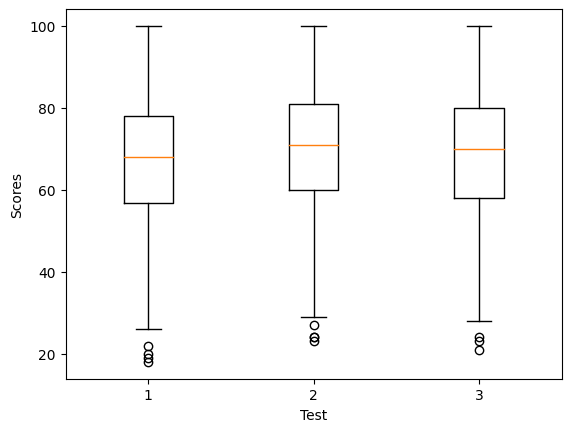

In [9]:
d = np.load("exams.npy")
plt.boxplot(d)
plt.xlabel("Test")
plt.ylabel("Scores")
plt.show()

### Missing Data

In [10]:
a = np.arange(10, dtype="float64")
a[3] = np.nan
np.isnan(a[3])

True

In [11]:
a[3] == np.nan

False

In [12]:
a[3] is np.nan

False

Notice that direct comparison to `np.nan` with either `==` or is doesn’t work; only testing with `np.isnan` works.

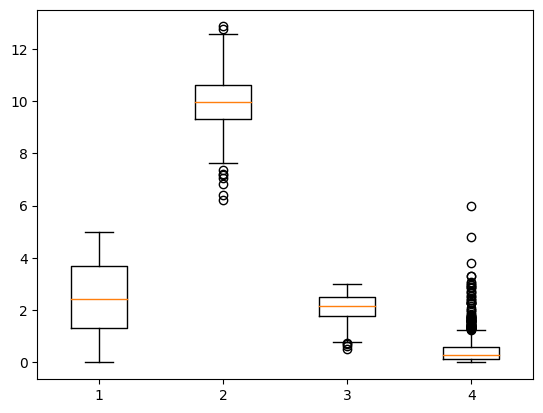

In [13]:
N = 1000
np.random.seed(123)
x = np.zeros((N, 4))
x[:, 0] = 5*np.random.random(N)
x[:, 1] = np.random.normal(10, 1, size=N)
x[:, 2] = 3 * np.random.beta(5, 2, N)
x[:, 3] = 0.3 * np.random.lognormal(size=N)

plt.boxplot(x)
plt.show()

In [14]:
# let's add some random NaN elements to x
i = np.random.randint(0, N, size=int(0.05*N))
x[i, 0] = np.nan
i = np.random.randint(0, N, size=int(0.05*N))
x[i, 1] = np.nan
i = np.random.randint(0, N, size=int(0.05*N))
x[i, 2] = np.nan
i = np.random.randint(0, N, size=int(0.05*N))
x[i, 3] = np.nan

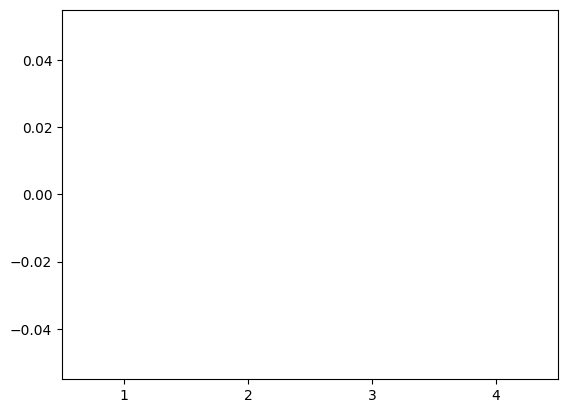

In [15]:
plt.boxplot(x)
plt.show()

Because we have features that are highly not normally distributed, we’ll
update missing values with the median instead of the mean

In [16]:
good_idx = np.where(~np.isnan(x[:, 0]))[0]
m = np.median(x[good_idx, 0])
bad_idx = np.where(np.isnan(x[:,0]))[0]
x[bad_idx, 0] = m

mean_before = np.mean(x[good_idx,0])
std_before = np.std(x[good_idx, 0])

mean_after = np.mean(x[:, 0])
std_after = np.std(x[:,0])


In [17]:
print(f"Mean, std before updating NaN values: {mean_before}, {std_before}")
print(f"Mean, std after updating NaN values: {mean_after}, {std_after}")


Mean, std before updating NaN values: 2.503729927860764, 1.4230940486144708
Mean, std after updating NaN values: 2.502927531665383, 1.3877948443693542


### Correlation

#### Pearson Correlation:

$$corr(X, Y) = 
\frac{E(XY) - E(X)E(Y)}{\sqrt{E(X^2) - [E(X)]^2} \cdot \sqrt{E(Y^2) - [E(Y)]^2}}
$$

In [18]:
# Pearson Correlation Coefficient
def pearson(x, y):
    exy = (x*y).mean()
    ex = x.mean()
    ey = y.mean()
    exx = (x*x).mean()
    ex2 = (x.mean())**2
    eyy = (y*y).mean()
    ey2 = (y.mean())**2
    
    return ((exy - ex*ey)/(np.sqrt(exx-ex2)*np.sqrt(eyy-ey2)))

In [19]:
np.random.seed(123)
N = 100
x = np.linspace(0, 1, N) + (np.random.random(N)-0.5)
y = np.random.random(N) * x
z = -0.1 * np.random.random(N) * x


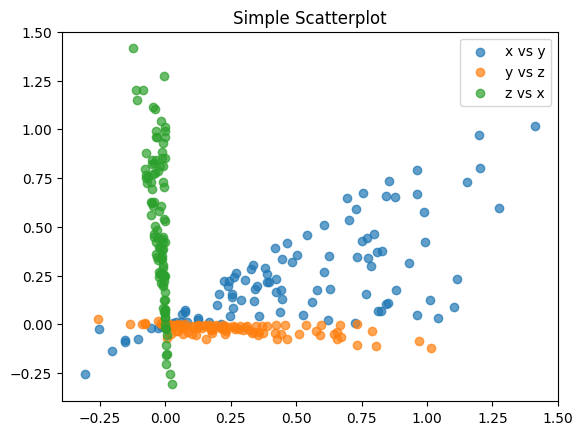

In [20]:
# Create scatterplot
plt.scatter(x, y, label='x vs y', alpha=0.7)
plt.scatter(y, z, label='y vs z', alpha=0.7)
plt.scatter(z, x, label='z vs x', alpha=0.7)

plt.title('Simple Scatterplot')
plt.legend()
plt.show()

In [21]:
print(f"pearson(x, y): {pearson(x, y)}")
print(f"pearson(y, z): {pearson(y, z)}")
print(f"pearson(z, x): {pearson(z, x)}")


pearson(x, y): 0.7062428200752774
pearson(y, z): -0.6107451070259048
pearson(z, x): -0.6468430327237882


NumPy returns the following, with x, y, and z stacked as a single 3 × 100 array:

In [22]:
d = np.vstack((x, y, z))
print(np.corrcoef(d))

[[ 1.          0.70624282 -0.64684303]
 [ 0.70624282  1.         -0.61074511]
 [-0.64684303 -0.61074511  1.        ]]


In an image, nearby pixels are usually highly correlated. Let’s see if this is actually true for a sample apple image: 


![Apple Image](apple.png "Optional title")


In [23]:
from matplotlib.image import imread 

apple = imread("apple.webp")


In [24]:
# Row x Col x RGB Channel
apple.shape

(240, 240, 3)

In [25]:
a = apple[120, :, 1].astype('float64') # let's take a row in the middle
b = apple[121, :, 1].astype('float64')
c = apple[190, :, 1].astype('float64') # row from the bottom region
d = np.random.random(240)

In [26]:
pearson(a, b)

0.9941560249446773

we can see that a and b are strongly correlated

In [27]:
pearson(a, c)

0.5666601328654954

In [28]:
pearson(a, d)

0.05423215812360191

r 
s
​
 =1− 
n(n 
2
 −1)
6∑d 
i
2
​
 
​


### Speareman Correlation Coefficient

The formula for Spearman's rank correlation coefficient ($ \rho$) is:

$$
\rho = 1 - \left( \frac{6}{n(n^2 - 1)} \sum_{i=0}^{n-1} d_i^2 \right)

$$
Where:
- $n$: Number of data points.
- $ d_i $: Difference between ranks of $X$ and $Y$ for the $i$-th data point.
- $( \sum_{i=0}^{n-1} d_i^2 )$: Sum of squared rank differences.


In [29]:
def spearman(x, y):
    n = len(x)
    t = x[np.argsort(x)]
    rx = []
    for i in range(n):
        rx.append(np.where(x[i] == t)[0][0])
    rx = np.array(rx, dtype="float64")
    t = y[np.argsort(y)]
    ry = []
    for i in range(n):
        ry.append(np.where(y[i] == t)[0][0])
    ry = np.array(ry, dtype="float64")
    d = rx - ry
    return (1.0 - (6.0/(n*(n**2-1)))*(d**2).sum())

In [30]:
spearman(a, b)

0.9895931352974878

In [31]:
spearman(a, c)

0.8059827427559506

In [32]:
spearman(a, d)

0.19322253858573935

In [33]:
# Built-in options
from scipy.stats import spearmanr
print(spearmanr(a, b)[0])

0.9889047078957551


It’s important to remember the fundamental difference between the Pearson and Spearman correlations. For example, consider the correlation between a linear ramp and the sigmoid function:

In [34]:
ramp = np.linspace(-20, 20, 1000)
sig = 1.0 / (1.0 + np.exp(-ramp))
print(pearson(ramp, sig))
print(spearman(ramp, sig))

0.9053277293366915
1.0


Here, ramp increases linearly from –20 to 20 and sig follows a sigmoid shape
(“S” curve). The Pearson correlation will be on the high side, since both are
increasing as x becomes more positive, but the association is not purely linear. Running the example gives the results above, indicating a Pearson correlation of 0.9 but a perfect Spearman correlation of 1.0, since for every increase in ramp there is an increase in sig and only an
increase. The Spearman correlation has captured the nonlinear relationship between the arguments, while the Pearson correlation has only hinted
at it. If we’re analyzing a dataset intended for a classical machine learning
algorithm, the Spearman correlation might help us decide which features to
keep and which to discard.

### Hypothesis Testing

In [ ]:
a = np.random.normal(85, 6, 50).astype("int32")
a[np.where(a > 100)] = 100 # capping any values over 100 to 100
b = np.random.normal(82, 7, 50).astype("int32")
b[np.where(b > 100)] = 100

In [38]:
from scipy.stats import ttest_ind
t, p = ttest_ind(a, b, equal_var=False)
print(f"t = {t:.2f}, p = {p:.2f}")

t = 2.33, p = 0.02


#### Confidence Interval

In [40]:
from scipy import stats
def CI(a, b, alpha=0.05):
    n1, n2 = len(a), len(b)
    s1, s2 = np.std(a, ddof=1)**2, np.std(b, ddof=1)**2
    df = (s1/n1 + s2/n2)**2 / ((s1/n1)**2/(n1-1)+(s2/n2)**2/(n2-1))
    tc = stats.t.ppf(1 - alpha/2, df)
    lo = (a.mean()-b.mean()) - tc*np.sqrt(s1/n1 + s2/n2)
    hi = (a.mean()-b.mean()) - tc*np.sqrt(s1/n1 + s2/n2)
    return lo, hi

In [41]:
CI(a, b)

(0.4415714737551273, 0.4415714737551273)

In [44]:
## Cohen's d
def Cohen_d(a, b):
    s1 = np.std(a, ddof=1)**2
    s2 = np.std(b, ddof=1)**2
    return (a.mean() - b.mean()) / np.sqrt(0.5*(s1+s2))

In [45]:
Cohen_d(a, b)

0.4659350238493651

### The Mann-Whitney U Test

The t-test assumes the distribution of the source data is normal. If the data is not normally distributed, we should instead use a nonparametric test. Nonparametric tests make no assumptions about the underlying distribution of the data. The Mann-Whitney U test, sometimes called the Wilcoxon rank-sum test, is a nonparametric test to help decide if two different sets of data come from the same parent distribution. The Mann-Whitney U test does not rely directly on the values of the data, but instead uses the data’s ranking.

In [47]:
from scipy.stats import mannwhitneyu
u, p = mannwhitneyu(a, b)
print(f"U = {u}, p = {p}")

U = 1604.5, p = 0.014429607555793639
